## Phenotypic phase plane analysis
To analyse the cell factory's response to changes in conditions, most importantly oxygen, xylose and glucose, we perform a phenotypic phase plane analysis on the baseline growth and progesterone production.

In [1]:
# Load packages and model
%matplotlib inline
import numpy as np
from matplotlib import cm
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from cobra.io import read_sbml_model
from cobra.flux_analysis import production_envelope
from cameo import phenotypic_phase_plane
from cameo.visualization.plotting.with_plotly import PlotlyPlotter


In [2]:
import matplotlib.pyplot as plt
from cobra.io import read_sbml_model
model=read_sbml_model('Models/yeast8.xml')

from cobra.flux_analysis.phenotype_phase_plane import production_envelope

In [3]:
# Renaming IDs for exchange reactions needed
glc_exchange = model.reactions.r_1714
o2_exchange = model.reactions.r_1992
growth = model.reactions.r_2111

In [4]:
medium = model.medium

#Amping glucose levels to 1000.0
medium['r_1714'] = 700
model.reactions.r_1714.bounds = -1000, 0

In [5]:
ppp_biomass = production_envelope(model,
                    reactions=[glc_exchange],
                    objective=growth)
ppp_biomass

,carbon_source,flux_minimum,carbon_yield_minimum,mass_yield_minimum,flux_maximum,carbon_yield_maximum,mass_yield_maximum,r_1714
0,r_1714,0.0,0.0,0.0,14.768442,0.0,0.0,-1000.000000
1,r_1714,0.0,0.0,0.0,15.472974,0.0,0.0,-947.370341
2,r_1714,0.0,0.0,0.0,16.168990,0.0,0.0,-894.740681
3,r_1714,0.0,0.0,0.0,16.830903,0.0,0.0,-842.111022
4,r_1714,0.0,0.0,0.0,17.450746,0.0,0.0,-789.481363
5,r_1714,0.0,0.0,0.0,18.070590,0.0,0.0,-736.851704
6,r_1714,0.0,0.0,0.0,18.690434,0.0,0.0,-684.222044
7,r_1714,0.0,0.0,0.0,19.310277,0.0,0.0,-631.592385
8,r_1714,0.0,0.0,0.0,19.645098,0.0,0.0,-578.962726
9,r_1714,0.0,0.0,0.0,18.635567,0.0,0.0,-526.333066


<Axes: xlabel='Glucose uptake [mmol/g DW/h]', ylabel='Biomass objective [1/h]'>

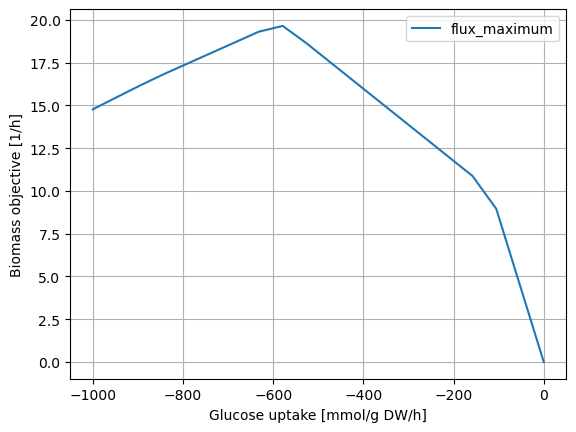

In [6]:
ppp_biomass.plot(x='r_1714', y='flux_maximum', xlabel="Glucose uptake [mmol/g DW/h]", ylabel="Biomass objective [1/h]", grid = True)

In [7]:
medium_oxy_ex = model.reactions.get_by_id('r_1992')
medium = model.medium
with model: #modification are done locally within the indent
    growth_rate = model.optimize().objective_value
    print("At oxygen concentration = {}:".format(medium[medium_oxy_ex.id]), "Maximum theoretical growth rate =", growth_rate, "h^-1")
    
    medium[medium_oxy_ex.id] = 300 #oxygen level is changed 
    model.medium = medium
    
    growth_rate = model.optimize().objective_value
    print("At oxygen concentration = {}:".format(medium[medium_oxy_ex.id]), "Maximum theoretical growth rate =", growth_rate, "h^-1")  
    
    medium[medium_oxy_ex.id] = 50 #oxygen level is changed 
    model.medium = medium
    
    growth_rate = model.optimize().objective_value
    print("At oxygen concentration = {}:".format(medium[medium_oxy_ex.id]), "Maximum theoretical growth rate =", growth_rate, "h^-1")    


At oxygen concentration = 1000.0: Maximum theoretical growth rate = 19.817859616711736 h^-1
At oxygen concentration = 300: Maximum theoretical growth rate = 19.81785961671159 h^-1
At oxygen concentration = 50: Maximum theoretical growth rate = 11.92667736787791 h^-1


In [8]:
ppp_isoamyl_acetate = production_envelope(model,
                    reactions=[glc_exchange],
                    objective=model.reactions.r_1180)
ppp_isoamyl_acetate

,carbon_source,flux_minimum,carbon_yield_minimum,mass_yield_minimum,flux_maximum,carbon_yield_maximum,mass_yield_maximum,r_1714
0,r_1714,0.0,0.0,NaN,245.019549,2.858561e-01,NaN,-1000.000000
1,r_1714,0.0,0.0,NaN,249.768090,3.075842e-01,NaN,-947.370341
2,r_1714,0.0,0.0,NaN,253.472323,3.305066e-01,NaN,-894.740681
3,r_1714,0.0,0.0,NaN,257.122935,3.562200e-01,NaN,-842.111022
4,r_1714,0.0,0.0,NaN,260.182466,3.844881e-01,NaN,-789.481363
5,r_1714,0.0,0.0,NaN,262.602221,4.157814e-01,NaN,-736.851704
6,r_1714,0.0,0.0,NaN,265.021975,4.518888e-01,NaN,-684.222044
7,r_1714,0.0,0.0,NaN,265.044186,4.895851e-01,NaN,-631.592385
8,r_1714,0.0,0.0,NaN,265.044186,5.340900e-01,NaN,-578.962726
9,r_1714,0.0,0.0,NaN,263.950896,5.850719e-01,NaN,-526.333066


(0.0, 300.0)

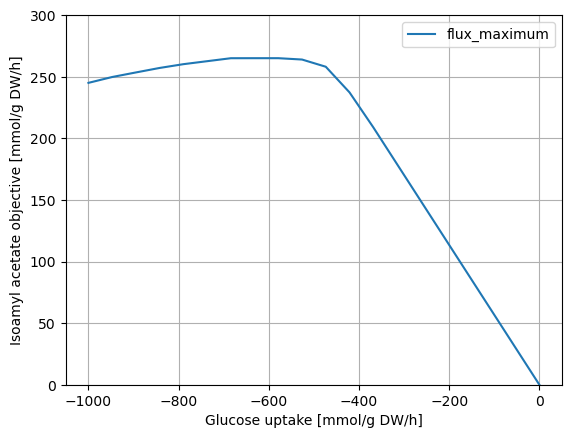

In [9]:
ppp_isoamyl_acetate.plot(x='r_1714', y='flux_maximum', xlabel="Glucose uptake [mmol/g DW/h]", 
                         ylabel="Isoamyl acetate objective [mmol/g DW/h]", grid=True).set_ylim(0, 300)


In [10]:
ppp_o2 = production_envelope(model,
                            reactions=[o2_exchange],
                            objective=growth)
ppp_o2

,carbon_source,flux_minimum,carbon_yield_minimum,mass_yield_minimum,flux_maximum,carbon_yield_maximum,mass_yield_maximum,r_1992
0,r_1714,0.0,0.0,0.0,5.433937,0.0,0.0,-1000.000000
1,r_1714,0.0,0.0,0.0,7.104409,0.0,0.0,-947.368421
2,r_1714,0.0,0.0,0.0,8.676861,0.0,0.0,-894.736842
3,r_1714,0.0,0.0,0.0,10.000742,0.0,0.0,-842.105263
4,r_1714,0.0,0.0,0.0,11.324623,0.0,0.0,-789.473684
5,r_1714,0.0,0.0,0.0,12.648503,0.0,0.0,-736.842105
6,r_1714,0.0,0.0,0.0,13.972384,0.0,0.0,-684.210526
7,r_1714,0.0,0.0,0.0,15.296265,0.0,0.0,-631.578947
8,r_1714,0.0,0.0,0.0,16.620146,0.0,0.0,-578.947368
9,r_1714,0.0,0.0,0.0,17.933294,0.0,0.0,-526.315789


<Axes: xlabel='Oxygen uptake rate [mmol/g DW/h]', ylabel='Biomass objective [1/h]'>

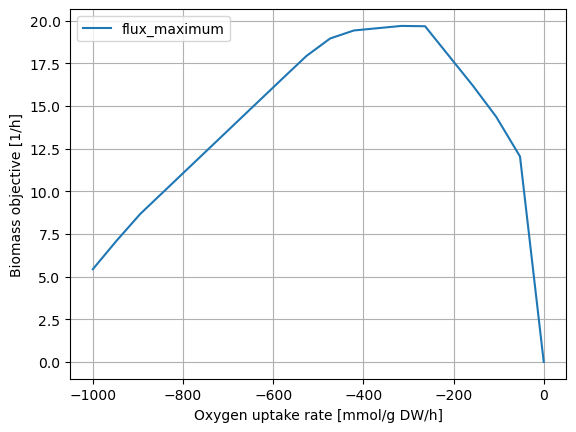

In [11]:
ppp_o2.plot(x='r_1992', y='flux_maximum', xlabel="Oxygen uptake rate [mmol/g DW/h]", ylabel="Biomass objective [1/h]", grid=True)

In [12]:
ppp_isoa_vs_o2 = production_envelope(model,
                    reactions=[o2_exchange],
                    objective=model.reactions.r_1180)
ppp_isoa_vs_o2

,carbon_source,flux_minimum,carbon_yield_minimum,mass_yield_minimum,flux_maximum,carbon_yield_maximum,mass_yield_maximum,r_1992
0,r_1714,0.0,0.0,NaN,72.834657,0.088691,NaN,-1000.000000
1,r_1714,0.0,0.0,NaN,96.395364,0.125610,NaN,-947.368421
2,r_1714,0.0,0.0,NaN,119.557679,0.167241,NaN,-894.736842
3,r_1714,0.0,0.0,NaN,136.839690,0.200942,NaN,-842.105263
4,r_1714,0.0,0.0,NaN,154.121701,0.238172,NaN,-789.473684
5,r_1714,0.0,0.0,NaN,171.403712,0.279518,NaN,-736.842105
6,r_1714,0.0,0.0,NaN,186.598778,0.339944,NaN,-684.210526
7,r_1714,0.0,0.0,NaN,201.636372,0.418059,NaN,-631.578947
8,r_1714,0.0,0.0,NaN,215.500430,0.427980,NaN,-578.947368
9,r_1714,0.0,0.0,NaN,229.155906,0.424089,NaN,-526.315789


(0.0, 300.0)

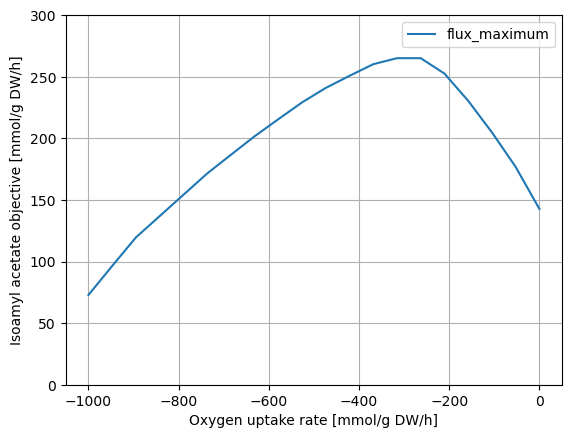

In [13]:
ppp_isoa_vs_o2.plot(x='r_1992', y='flux_maximum', xlabel="Oxygen uptake rate [mmol/g DW/h]", 
                    ylabel="Isoamyl acetate objective [mmol/g DW/h]", grid=True).set_ylim(0,300)

It seems as though the yeast is subject to oxygen stress, when the uptake rate is increased above the bound of (i.e. $<-250$).


<Axes: title={'center': 'Isoamyl acetate productivity vs. oxygen uptake'}, xlabel='Oxygen uptake rate [mmol/g DW/h]', ylabel='Isoamyl acetate objective [mmol/g DW/h]'>

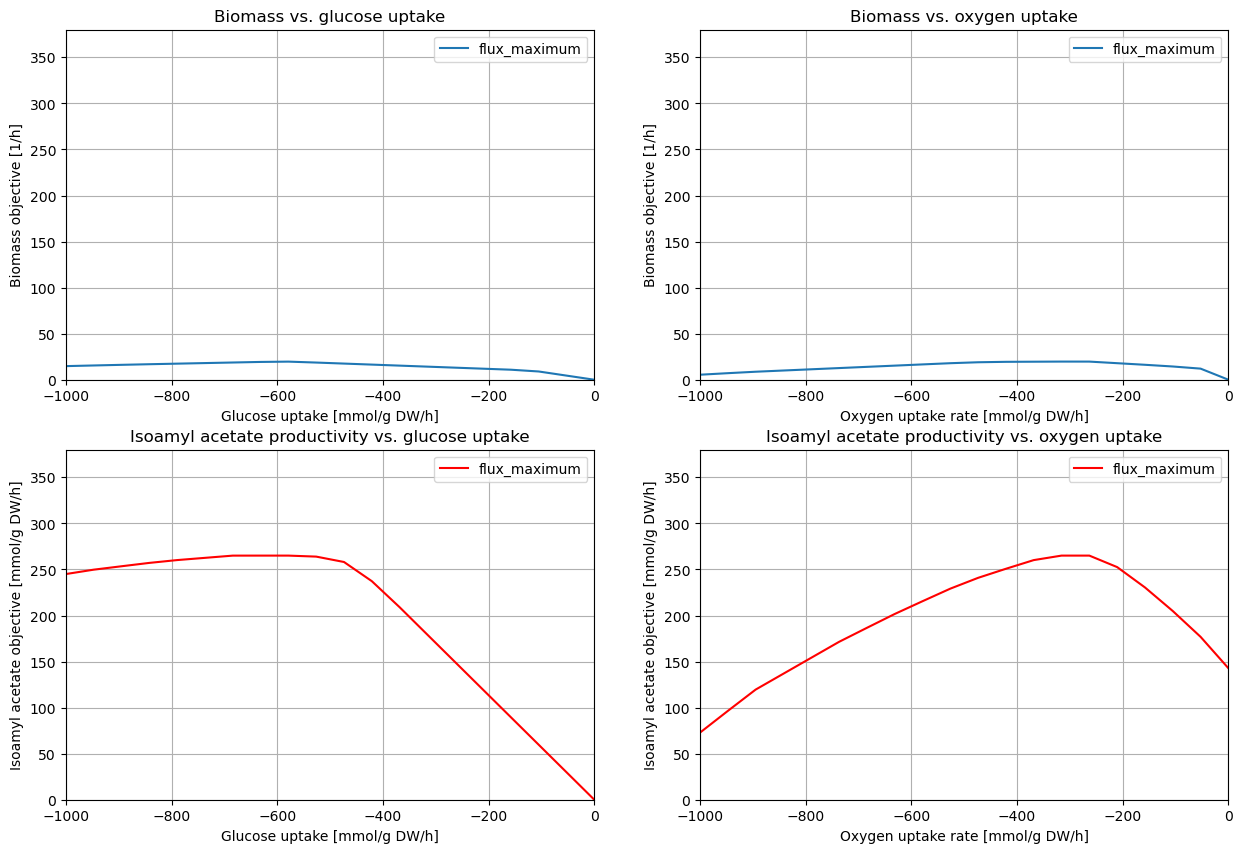

In [15]:
# Graphs all together, Idk how to set different axis to individual plots

fig, axs = plt.subplots(2,2,figsize=(15,10), subplot_kw={'xlim':(-1000,0),'ylim': (0,380)})

ppp_biomass.plot(x='r_1714', y='flux_maximum', xlabel="Glucose uptake [mmol/g DW/h]", 
                 ylabel="Biomass objective [1/h]", grid = True, ax=axs[0][0], title="Biomass vs. glucose uptake")

ppp_o2.plot(x='r_1992', y='flux_maximum', xlabel="Oxygen uptake rate [mmol/g DW/h]", 
                    ylabel="Biomass objective [1/h]", grid=True, ax=axs[0][1], title="Biomass vs. oxygen uptake")

ppp_isoamyl_acetate.plot(x='r_1714', y='flux_maximum', xlabel="Glucose uptake [mmol/g DW/h]", 
                    ylabel="Isoamyl acetate objective [mmol/g DW/h]", grid=True, ax=axs[1][0], title="Isoamyl acetate productivity vs. glucose uptake", 
                    color = "red")

ppp_isoa_vs_o2.plot(x='r_1992', y='flux_maximum', xlabel="Oxygen uptake rate [mmol/g DW/h]", 
                    ylabel="Isoamyl acetate objective [mmol/g DW/h]", grid=True, ax=axs[1][1], title="Isoamyl acetate productivity vs. oxygen uptake", 
                    color="red" )